## CONCRETE COMPRESSIVE STRENGTH PREDICTION

*Dataset :* [link](https://www.kaggle.com/maajdl/yeh-concret-data)

## ABSTRACT:
- Concrete is the most important material in civil engineering.
- The concrete compressive strength is a highly nonlinear function of age and ingredients.

## DATA ATTRIBUTES INFORMATION:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable

## ***PLAN OF ATTACK***

***- Imputation***

***- Feature Selection***

***- Dimensionality Reduction***

***- Exploratory Data Analysis***

***- Dealing with outliers***

***- Feature Transformation*** (Standardization/Normalization)

***- Model Building*** (Iterative process)

***- Cross Validating*** (Iterative process)

***- Builing secure deployment ready pipelines***

***- Exporting binary file for production*** (Testing Environment)

## IMPORTS

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import missingno
from xgboost import XGBRegressor
from matplotlib import rcParams
import joblib



In [2]:
data= pd.read_csv('../input/yeh-concret-data/Concrete_Data_Yeh.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.rename(columns={'csMPa': 'strength'}, inplace=True)
print(data.shape)
data.head()

(1030, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## MISSING VALUE IMPUTATION

In [4]:
data.isnull().sum(axis = 0)

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

## TRAIN-VALIDATION-TEST SPLIT

In [5]:
from sklearn.model_selection import train_test_split
data, test = train_test_split(data,test_size=0.1, random_state=42)
data.shape

(927, 9)

In [6]:
test.shape

(103, 9)

## EDA | PHASE 1
Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 806 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            927 non-null    float64
 1   slag              927 non-null    float64
 2   flyash            927 non-null    float64
 3   water             927 non-null    float64
 4   superplasticizer  927 non-null    float64
 5   coarseaggregate   927 non-null    float64
 6   fineaggregate     927 non-null    float64
 7   age               927 non-null    int64  
 8   strength          927 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 72.4 KB


In [8]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,282.693851,72.906472,54.478209,181.289320,6.259439,973.425351,773.512729,45.304207,35.977821
std,106.213785,85.849376,64.448854,21.470616,5.978929,78.650706,80.811312,61.562434,16.741837
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,728.450000,10.500000,23.790000
50%,275.100000,22.000000,0.000000,185.000000,6.400000,968.000000,779.300000,28.000000,34.490000
75%,357.500000,142.800000,118.300000,192.000000,10.300000,1040.000000,825.000000,56.000000,46.215000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'strength'],
      dtype='object')

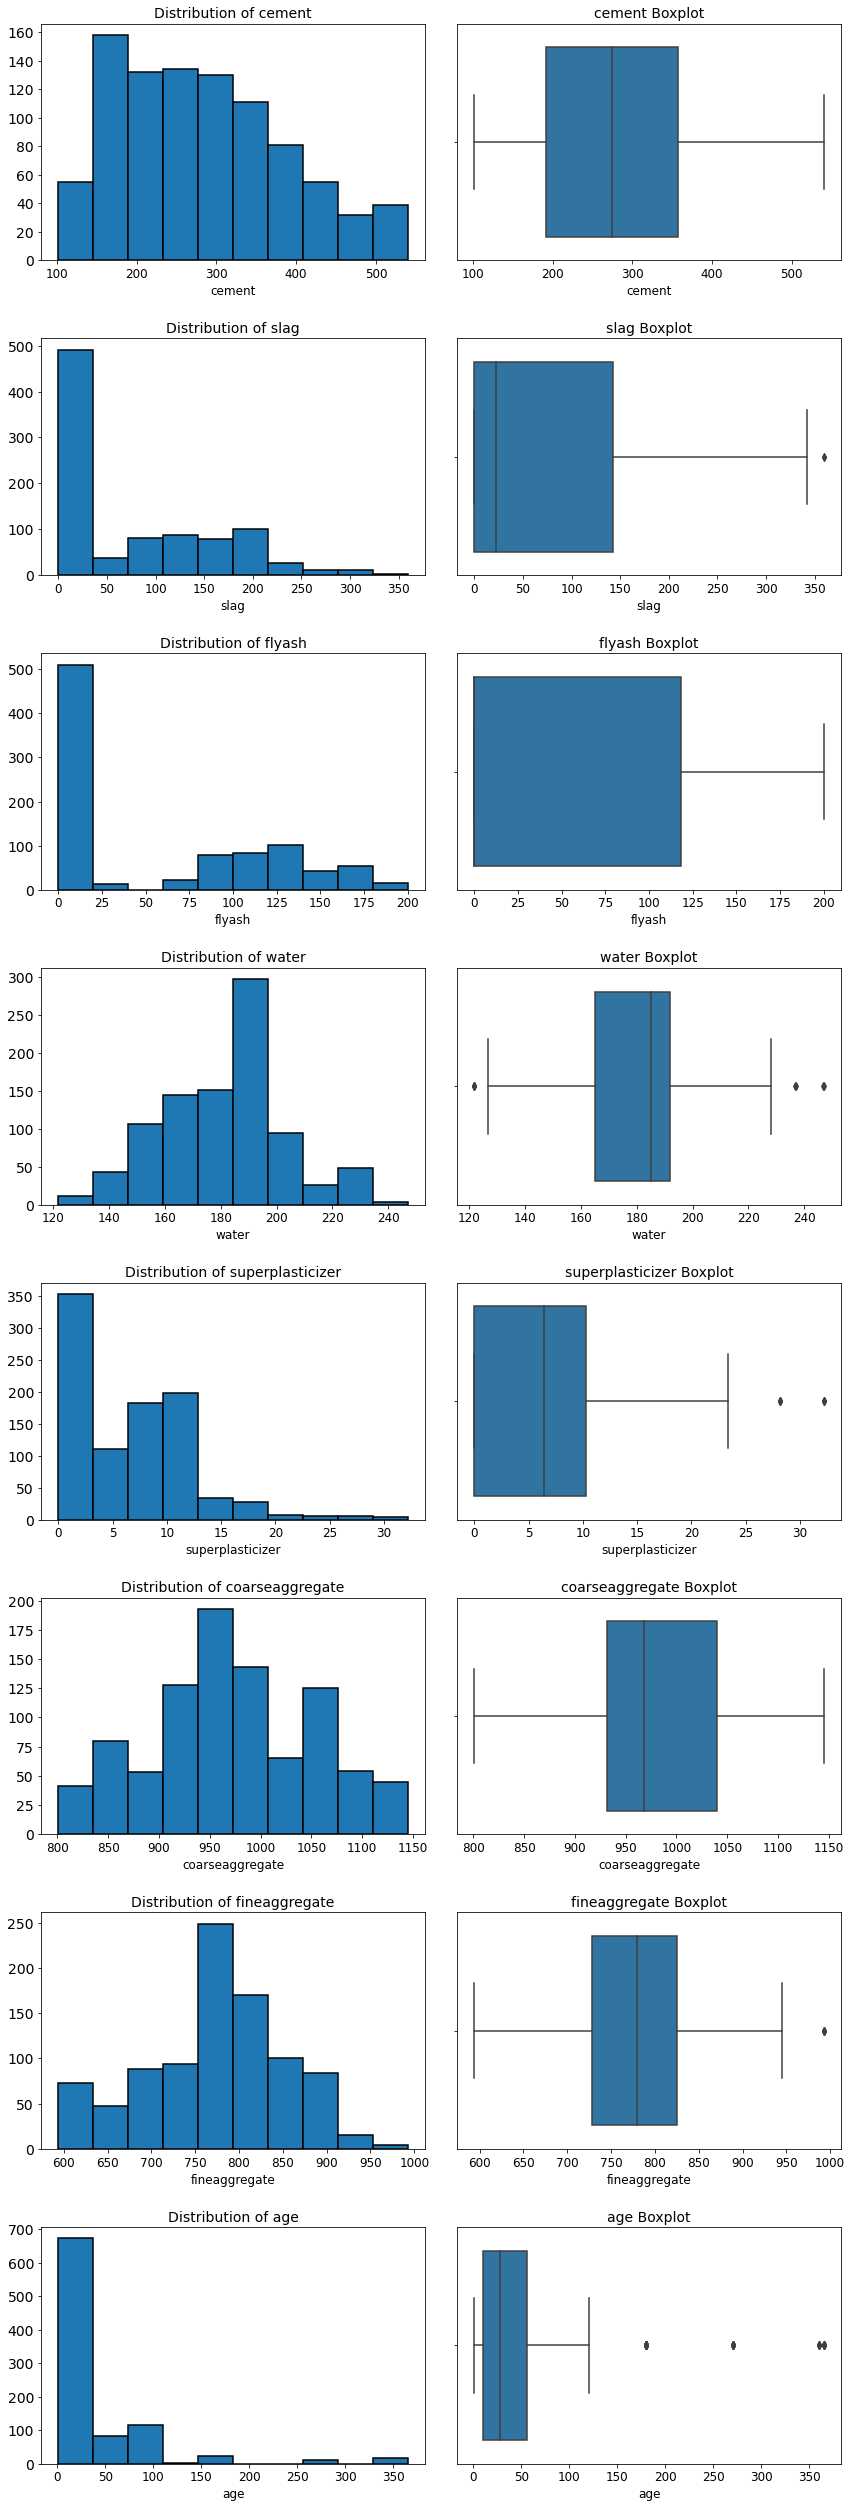

In [10]:
plt.figure(figsize=(12,35))
plt.rcParams.update({'font.size': 12})

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False,xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=14);
    plt.xlabel(f"{i[1]}", fontsize = 12);
    plt.tight_layout(h_pad=2, w_pad=2)
    
    plt.subplot(8,2,(2*i[0])+2);
    sns.boxplot(data[i[1]]);
    plt.title(f"{i[1]} Boxplot", fontsize=14);
    plt.tight_layout(h_pad=2, w_pad=2)

### KEY NOTES:

- Cement, water, coarse aggregate, and fine aggregate might follow normal distribution after some transformation
- After some transformation, we might find bi-modal distribution in slag and flayash columns
- Superplasticizer clearly belongs to a tweedie distribution
- Age column can be binned and then converted into a categorical feature

## DEALING WITH OUTLIERS

In [11]:
for col in data.columns[:-1]:
    print(f'Statistical Maximum for {col}: {(data[col].quantile(0.75)+ 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print(f'Statistical Minimum for {col}: {(data[col].quantile(0.25)- 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print()

Statistical Maximum for cement: 605.75
Statistical Minimum for cement: -56.25

Statistical Maximum for slag: 357.0
Statistical Minimum for slag: -214.20000000000002

Statistical Maximum for flyash: 295.75
Statistical Minimum for flyash: -177.45

Statistical Maximum for water: 232.64999999999998
Statistical Minimum for water: 124.25000000000001

Statistical Maximum for superplasticizer: 25.75
Statistical Minimum for superplasticizer: -15.450000000000001

Statistical Maximum for coarseaggregate: 1202.0
Statistical Minimum for coarseaggregate: 770.0

Statistical Maximum for fineaggregate: 969.8249999999999
Statistical Minimum for fineaggregate: 583.6250000000001

Statistical Maximum for age: 124.25
Statistical Minimum for age: -57.75



In [12]:
data[data['cement']>600].shape

(0, 9)

No outliers in cement column

In [13]:
data[data['slag']>350].shape

(2, 9)

In [14]:
data[data['slag']>350]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


Only 2 outliers in slag column

In [15]:
data[data['flyash']>290].shape

(0, 9)

No outliers in flyash column

In [16]:
data[data['water']>230].shape

(4, 9)

In [17]:
data[data['water']<124].shape

(5, 9)

In [18]:
data[data['water']>230]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23


In [19]:
data[data['water']<124]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75


Nine (9) outliers in water column

In [20]:
data[data['superplasticizer']>25].shape

(9, 9)

In [21]:
data[data['superplasticizer']>25]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9


Nine (9) outliers in superplasticizer column

In [22]:
data[data['coarseaggregate']>1200].shape

(0, 9)

In [23]:
data[data['coarseaggregate']<770].shape

(0, 9)

No outliers in coarseaggregate column

In [24]:
data[data['fineaggregate']>970].shape

(5, 9)

In [25]:
data[data['fineaggregate']<583].shape

(0, 9)

In [26]:
data[data['fineaggregate']>970]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


Five (5) outliers in fineaggregate column

In [27]:
data[data['age']>124].shape

(52, 9)

In [28]:
data[data['age']>124]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
66,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,360,44.70
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
755,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
603,339.0,0.0,0.0,197.0,0.0,968.0,781.0,180,36.45
762,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,32.72
60,304.0,76.0,0.0,228.0,0.0,932.0,670.0,270,54.38
620,254.0,0.0,0.0,198.0,0.0,968.0,863.0,365,29.79
621,307.0,0.0,0.0,193.0,0.0,968.0,812.0,180,34.49
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


Anyway, since we are going to bin age column, we can consider age above 124 as a separate bin

In [29]:
for idx, row in data.iterrows():
    if data.loc[idx, 'slag']> 350:
        data.loc[idx, 'slag'] = 350
        
    if data.loc[idx, 'water']> 230:
        data.loc[idx, 'water'] = 230
        
    if data.loc[idx, 'water']< 124:
        data.loc[idx, 'water'] = 124
        
    if data.loc[idx, 'superplasticizer']> 25:
        data.loc[idx, 'superplasticizer'] = 25
        
    if data.loc[idx, 'fineaggregate']> 970:
        data.loc[idx, 'fineaggregate'] = 970
    
    

## FEATURE ENGINEERING

### BINNING OF AGE COLUMN

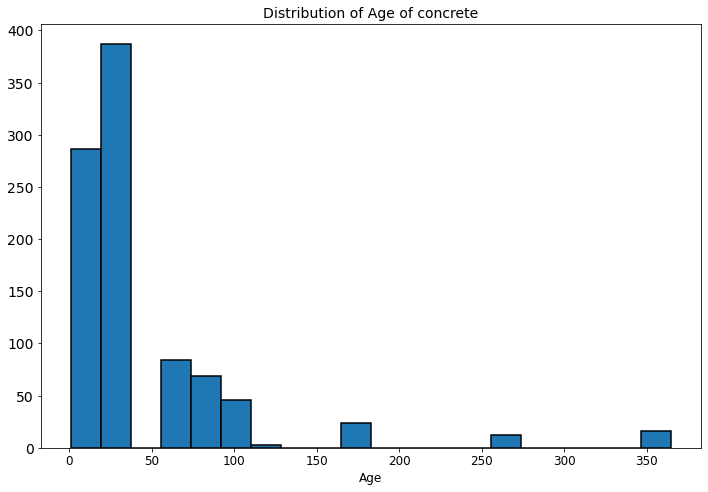

In [30]:
plt.figure(figsize=(10,7))
data['age'].hist(grid=False,xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black", bins=20);
plt.title(f"Distribution of Age of concrete",fontsize=14);
plt.xlabel(f"Age", fontsize = 12);
plt.tight_layout(h_pad=2, w_pad=2)
    

In [31]:
len(data['age'].value_counts())

14

In [32]:
data['age'].value_counts()

28     387
3      118
7      112
56      84
14      54
90      48
100     46
180     24
91      21
270     12
365     10
360      6
120      3
1        2
Name: age, dtype: int64

For better perspective, we consider 120 as the statistical maximum. We also club age of 1 and 3 days into 2 days. Similarly we club age of 90 and 91 as 90.

In [33]:
for idx, row in data.iterrows():
    if data.loc[idx, 'age']> 120:
        data.loc[idx, 'age'] = 120
        
    if data.loc[idx, 'age']== 1:
        data.loc[idx, 'age'] = 2
        
    if data.loc[idx, 'age']== 3:
        data.loc[idx, 'age'] = 2
        
    if data.loc[idx, 'age']== 91:
        data.loc[idx, 'age'] = 90

In [34]:
len(data['age'].value_counts())

8

In [35]:
data['age'].value_counts()

28     387
2      120
7      112
56      84
90      69
120     55
14      54
100     46
Name: age, dtype: int64

In [36]:
data['age'].value_counts().index.tolist()

[28, 2, 7, 56, 90, 120, 14, 100]

In [37]:
mylist = [28, 2, 7, 56, 90, 120, 14, 100]
mydict = {}
mylist.sort()
for (x,y) in enumerate(mylist):
    mydict[y]=x
    
    
print(mydict)

d = 50
takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
print(takeClosest(d, mylist))
print(mydict[takeClosest(d, mylist)])


{2: 0, 7: 1, 14: 2, 28: 3, 56: 4, 90: 5, 100: 6, 120: 7}
56
4


In [38]:
# print(data['age'].value_counts().index.tolist())
# agelist = [28, 2, 7, 56, 90, 120, 14, 100]
# takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
# takeClosest(9,agelist)

In [39]:
for idx, row in data.iterrows():
    if data.loc[idx, 'age'] in data['age'].value_counts().index.tolist():
        data.loc[idx, 'age'] = mydict[data.loc[idx, 'age']]

In [40]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
806,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,1,24.00
168,469.0,117.2,0.0,137.8,25.0,852.1,840.5,5,70.70
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,1,10.34
464,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,6,56.81
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,3,30.12


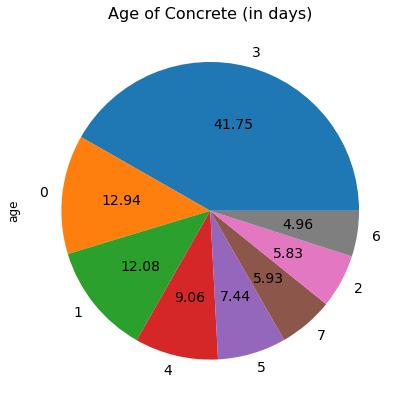

In [41]:
plt.figure(figsize = (7,7))
data['age'].value_counts().plot(kind  = 'pie', autopct = '%.2f', textprops={'fontsize': 14})
plt.tight_layout(pad=5.0);
plt.title('Age of Concrete (in days)',fontsize=16);

Now we have converted the numerical age feature into an ordinal categorical feature.

## EDA | PHASE 2

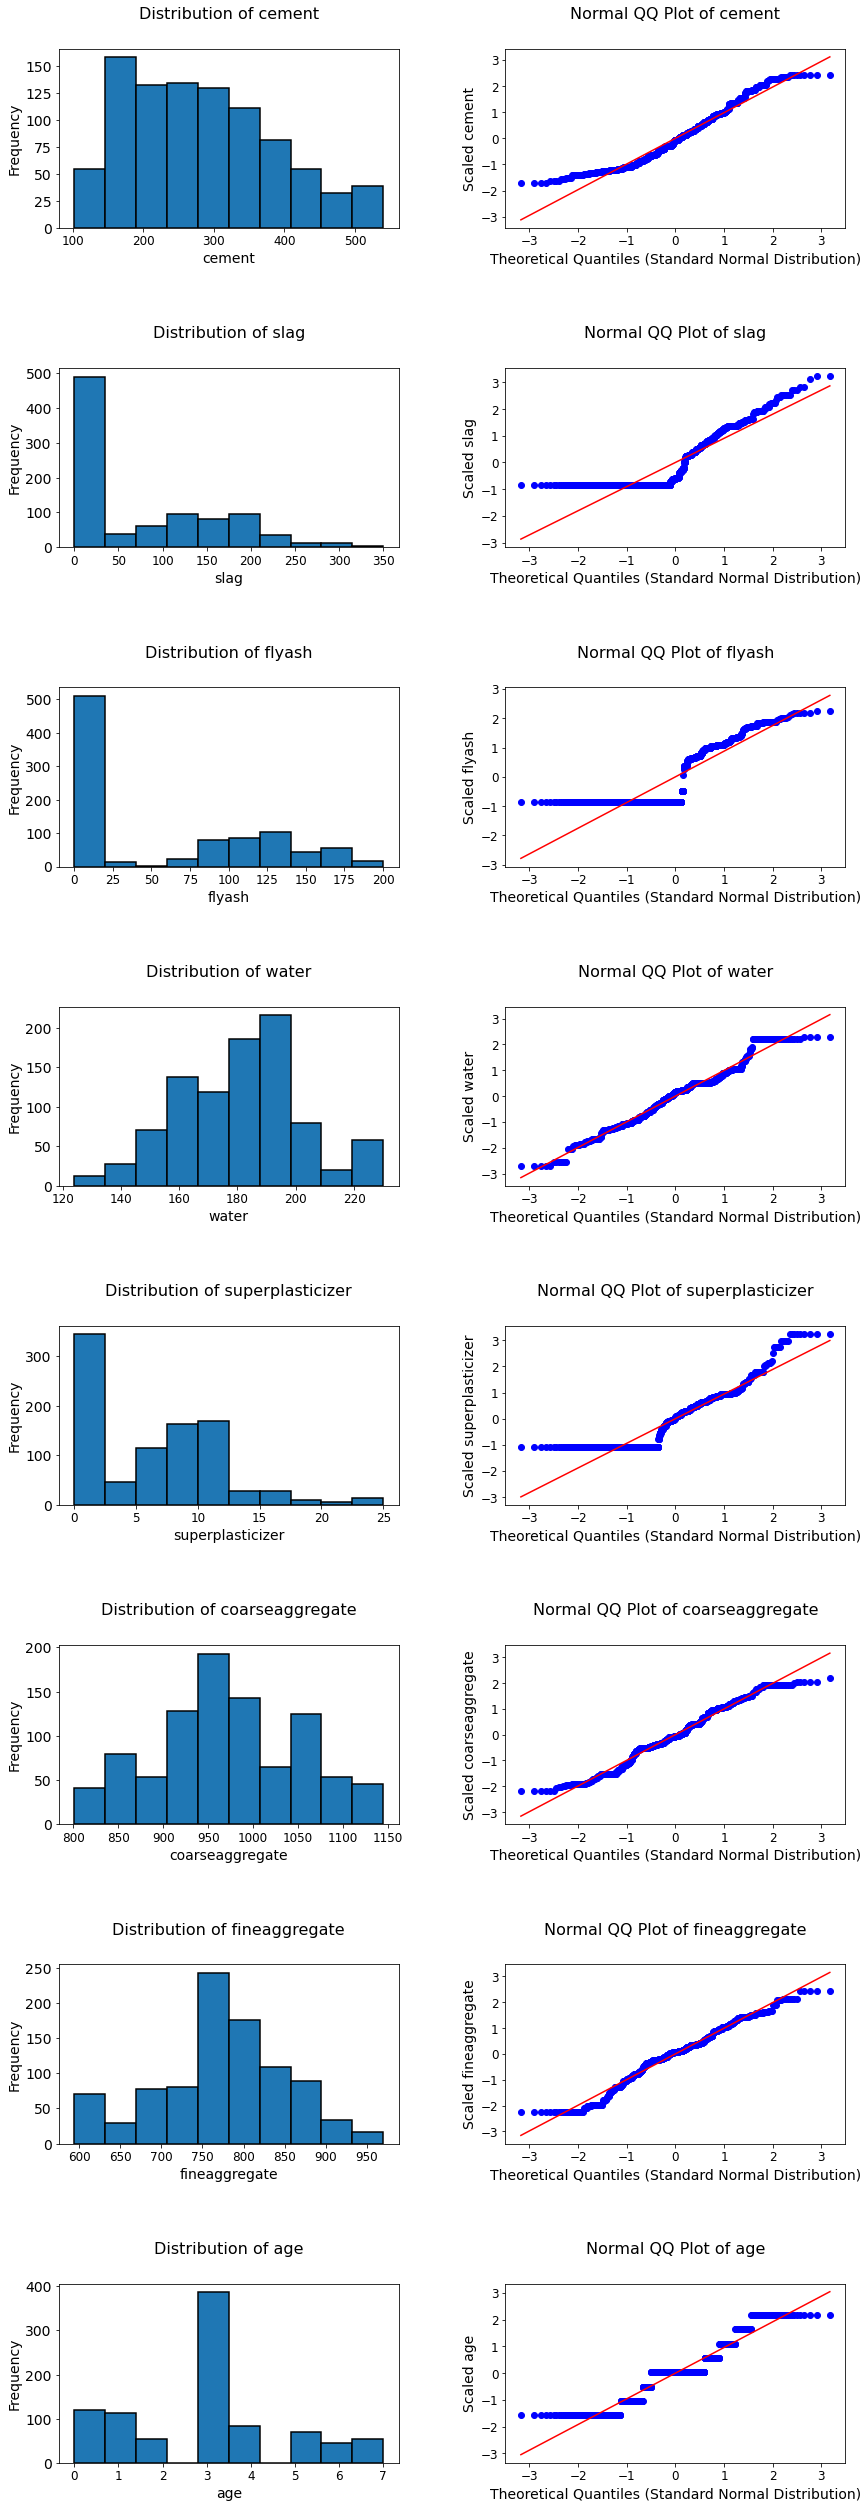

In [42]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tempData = data.copy()
tempData = tempData.drop(['strength'],axis=1)
tempData = sc.fit_transform(tempData)

temp_df = pd.DataFrame(tempData, columns = data.columns[:-1])


plt.figure(figsize=(12,35))

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(temp_df[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);

### KEY NOTES:

- Overall data is little bit right skewed. 
- The data needs to be standardized.
- Both the above requirements can be met by a yeo-jhonson feature transformation.

## FEATURE SELECTION | PHASE 1

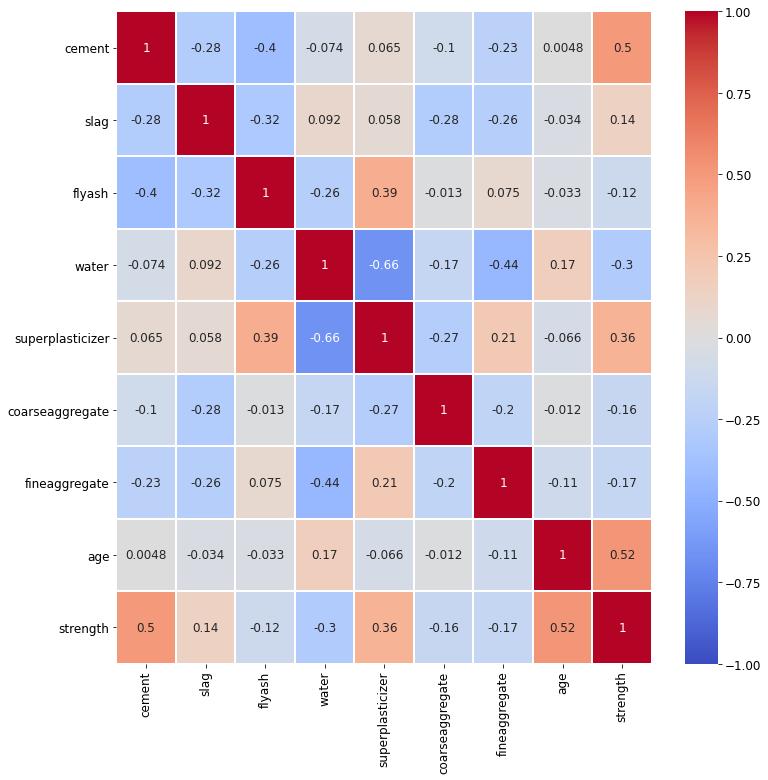

In [43]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, lw=0.2, edgecolor="white");

**We could not find any strongly irrelevant feature to remove**

## FEATURE IMPORTANCE

In [44]:
tempData = pd.get_dummies(data)
tempData

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
806,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,1,24.00
168,469.0,117.2,0.0,137.8,25.0,852.1,840.5,5,70.70
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,1,10.34
464,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,6,56.81
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,3,30.12
...,...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,0,24.40
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,2,42.22
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,6,33.56
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,3,68.30


<Figure size 1008x864 with 0 Axes>

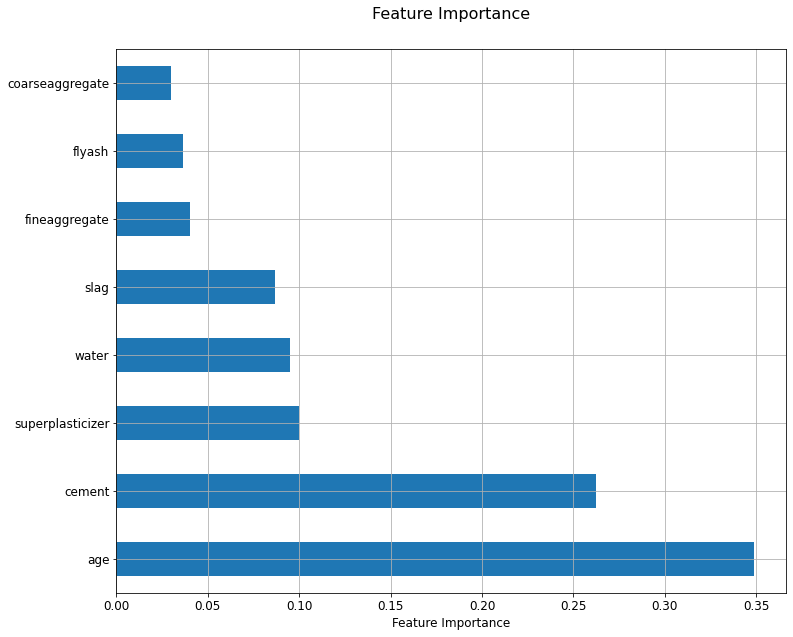

In [45]:
from sklearn.ensemble import ExtraTreesRegressor

fig = plt.figure(figsize=(14,12));
model = ExtraTreesRegressor()
tempData = pd.get_dummies(data)
model.fit(tempData.iloc[:,:-1], tempData.iloc[:,-1])
fig = plt.figure(figsize=(12,10));
feature_imps = pd.Series(model.feature_importances_, index = tempData.iloc[:,:-1].columns);
feature_imps.nlargest(12).plot(kind='barh');
plt.grid(True);
plt.title("Feature Importance", pad=30, fontsize=16)
plt.xlabel('Feature Importance');
plt.plot();

**But the question arises, how many optimal features are required to explain the variance of the data ?**

## FEATURE EXTRACTION

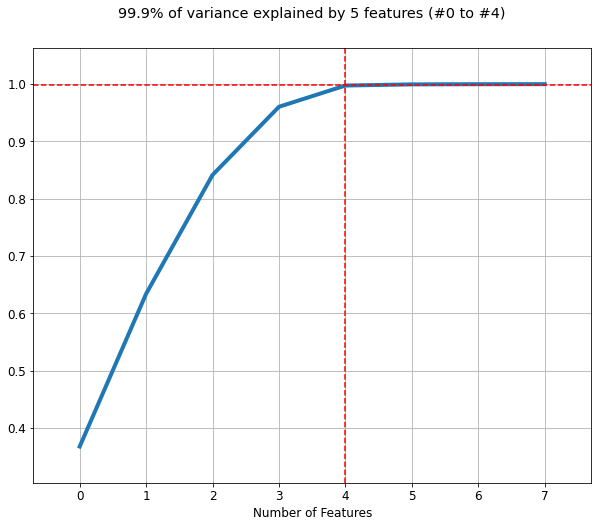

In [46]:
plt.figure(figsize=(10,8))
pca_dummy = PCA(n_components=None)
X_dummy = tempData.iloc[:,:-1].values
X_dummy = pca_dummy.fit_transform(X_dummy)
plt.plot(np.cumsum(pca_dummy.explained_variance_ratio_), linewidth=4)
plt.axhline(y = 0.999, c='r', linewidth =1.5, linestyle='--')
plt.axvline(x=4, c='r', linestyle = '--', linewidth =1.5)
plt.xlabel("Number of Features")
plt.margins(0.1)
plt.grid(True);
plt.title('99.9% of variance explained by 5 features (#0 to #4)', pad=30)
plt.plot();

### KEY NOTES:

Now we have two options:

- Handpick 5 best features out of the list. `Here, the domain knowledge could be of an advantage`



- Use PCA to extract 5 features from the list. `Here, we are safe from the potential loss of information`

**I would chose the first option as through domain knowledge, we penalize/regulate the model to learn only a particular type of relations with the features we believe are sufficient.**

## FEATURE SELECTION | PHASE 2

In [47]:
data_handpicked = data[['cement', 'slag', 'water', 'superplasticizer', 'age', 'strength']]
data_handpicked.head()

,cement,slag,water,superplasticizer,age,strength
806,382.0,0.0,185.0,0.0,1,24.00
168,469.0,117.2,137.8,25.0,5,70.70
590,238.1,0.0,185.7,0.0,1,10.34
464,167.0,75.4,164.0,7.9,6,56.81
998,304.8,0.0,196.0,9.8,3,30.12


In [48]:
pca = PCA(n_components=5)
data_extracted = tempData.iloc[:,:-1].values
data_extracted = pca.fit_transform(data_extracted)
print(data_extracted.shape)

(927, 5)


In [49]:
data_extracted = pd.DataFrame(data_extracted, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
data_extracted['strength'] = tempData.iloc[:,-1].values
data_extracted.head()

,col1,col2,col3,col4,col5,strength
0,130.350653,-41.833122,-62.885769,-41.058813,19.739205,24.00
1,155.407347,65.814111,168.039034,-22.750047,-59.768433,70.70
2,-10.934231,-92.152341,-107.182964,-101.881147,34.736060,10.34
3,-131.523433,-49.254034,-49.503487,61.752776,-38.861490,56.81
4,43.542935,-36.109203,-33.907750,86.663022,31.408305,30.12


---
## FEATURE TRANSFORMATION

In [50]:
from sklearn.preprocessing import PowerTransformer

transformer_handpicked = PowerTransformer(method='yeo-johnson', standardize=True)
transformer_extracted = PowerTransformer(method='yeo-johnson', standardize=True)

data_handpicked_transformed = transformer_handpicked.fit_transform(data_handpicked.iloc[:,:-1])
data_extracted_transformed = transformer_extracted.fit_transform(data_extracted.iloc[:,:-1])

In [51]:
data_handpicked_transformed = pd.DataFrame(data_handpicked_transformed, columns = data_handpicked.columns.tolist()[:-1])
data_handpicked_transformed['strength'] = data_handpicked['strength'].tolist()
print(data_handpicked_transformed.shape)
data_handpicked_transformed.head()

(927, 6)


,cement,slag,water,superplasticizer,age,strength
0,0.969178,-1.055997,0.184442,-1.235094,-1.030521,24.00
1,1.549287,0.927540,-2.070144,1.944042,1.081970,70.70
2,-0.290126,-1.055997,0.217182,-1.235094,-1.030521,10.34
3,-1.168066,0.741273,-0.806665,0.551291,1.526973,56.81
4,0.354638,-1.055997,0.696867,0.771486,0.113103,30.12


In [52]:
data_extracted_transformed = pd.DataFrame(data_extracted_transformed, columns = data_extracted.columns.tolist()[:-1])
data_extracted_transformed['strength'] = data_extracted['strength'].tolist()
print(data_extracted_transformed.shape)
data_extracted_transformed.head()

(927, 6)


,col1,col2,col3,col4,col5,strength
0,1.107525,-0.328651,-0.720546,-0.587472,0.579610,24.00
1,1.286080,0.746366,1.842310,-0.232233,-1.739864,70.70
2,0.032099,-0.989154,-1.292555,-1.827627,0.951372,10.34
3,-1.231834,-0.424100,-0.549354,0.958675,-1.091511,56.81
4,0.474691,-0.255662,-0.351224,1.251663,0.869388,30.12


---
## EDA | PHASE 3

### VISUALIZING HAND-PICKED DATA

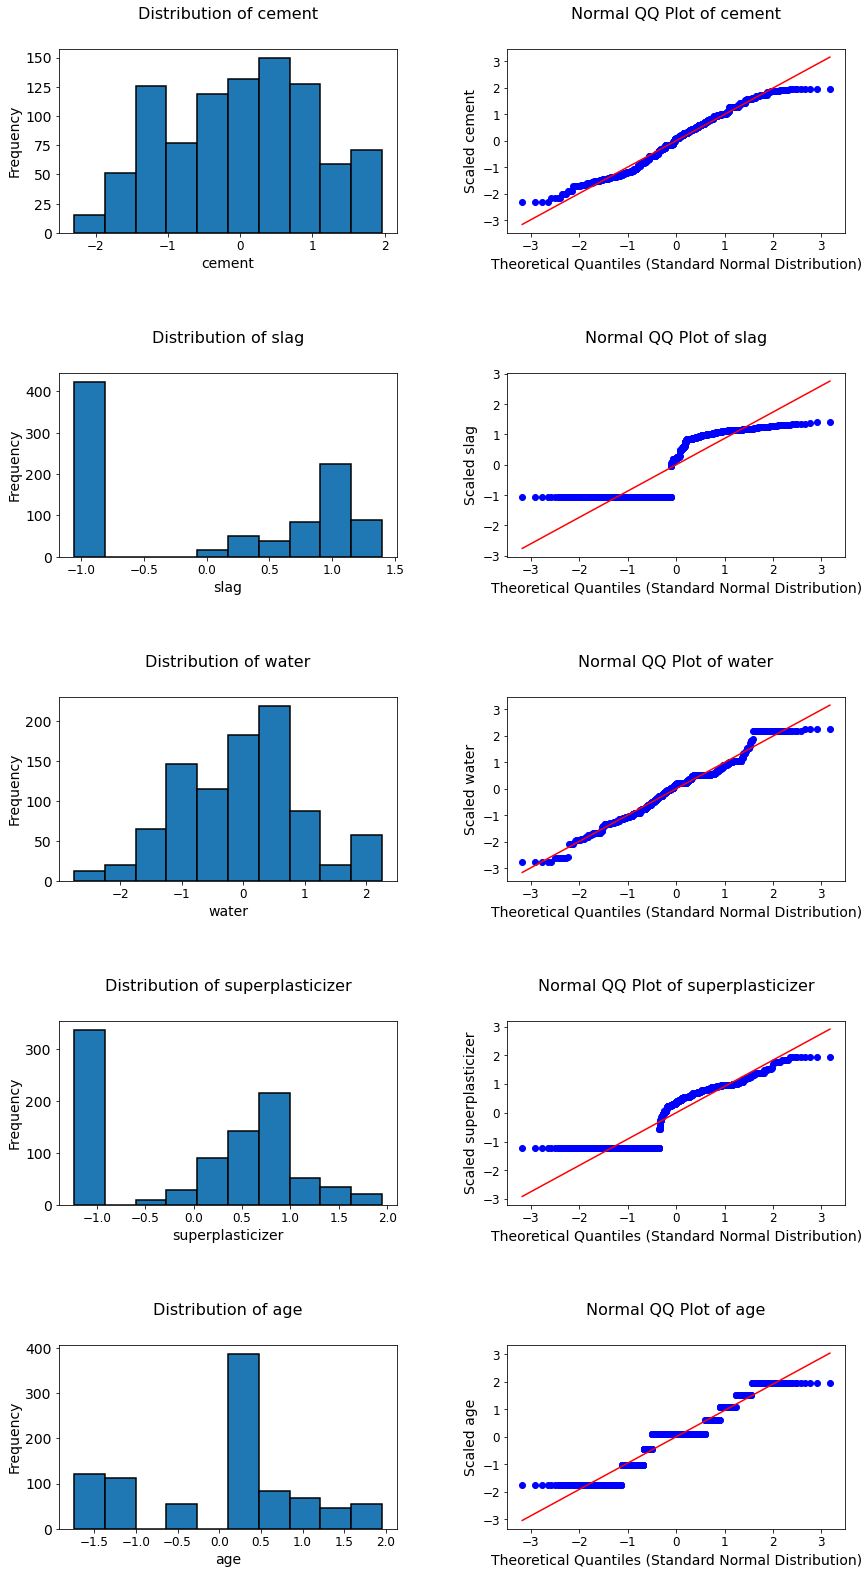

In [53]:
import scipy.stats as stats

plt.figure(figsize=(12,35))

for i in enumerate(data_handpicked_transformed.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data_handpicked_transformed[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(data_handpicked_transformed[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);

### VISUALIZING EXTRACTED DATA

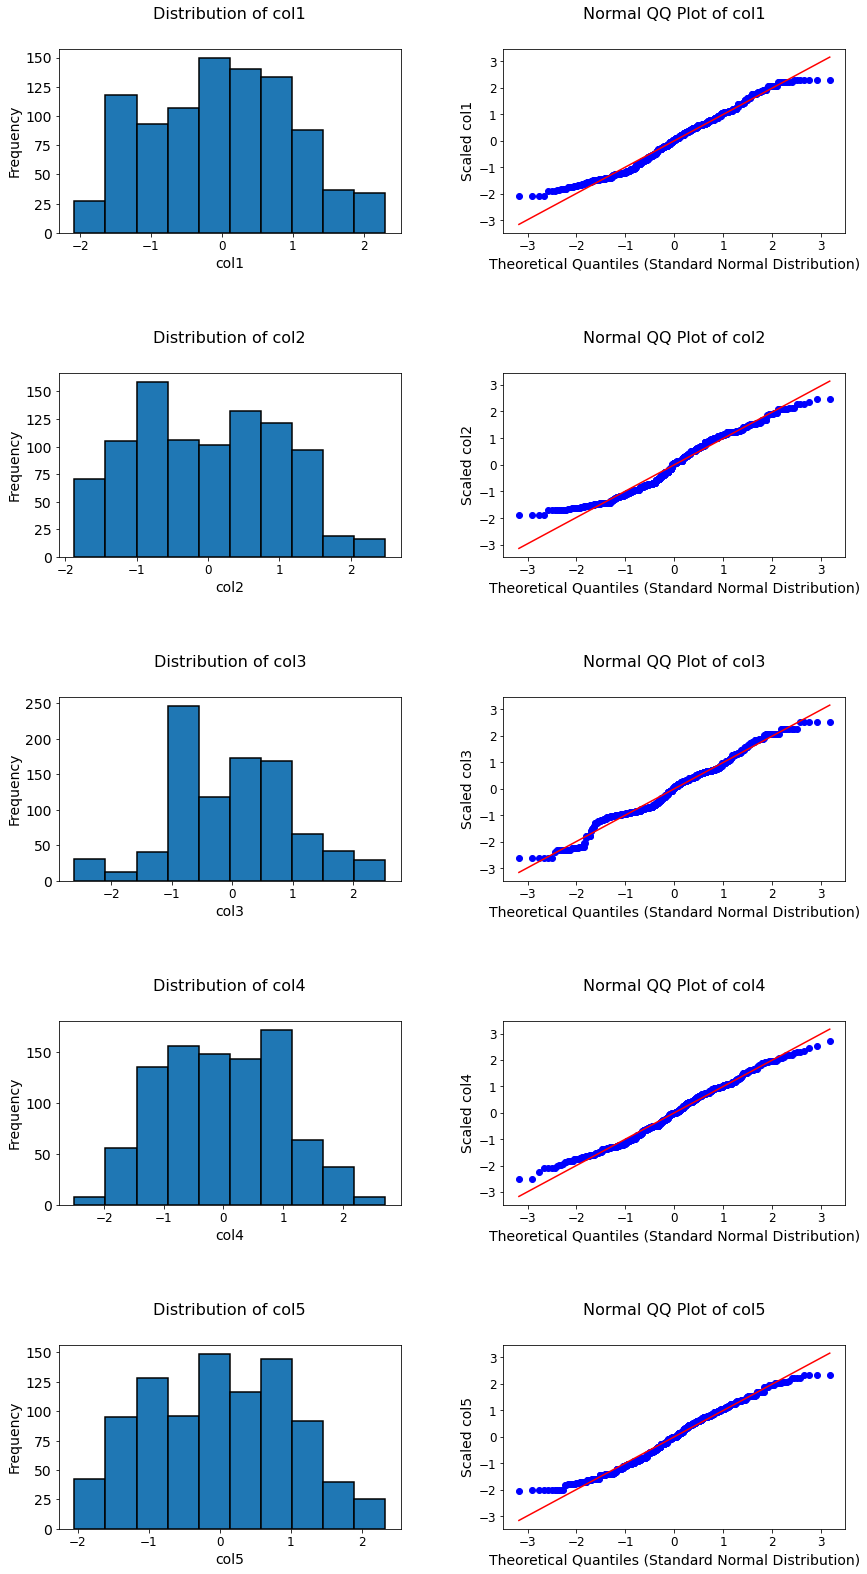

In [54]:
import scipy.stats as stats

plt.figure(figsize=(12,35))

for i in enumerate(data_extracted_transformed.columns[:-1]):
    plt.subplot(8,2,(2*i[0])+1);
    data_extracted_transformed[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(data_extracted_transformed[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);

## ML MODELLING 

`On handpicked data`

### TRAIN-VALIDATION SPLIT

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(data_handpicked_transformed.iloc[:,:-1],data_handpicked_transformed.iloc[:,-1] ,test_size=0.1, random_state=42)

In [56]:
X_train

,cement,slag,water,superplasticizer,age
174,-0.174312,-1.055997,-1.088411,1.068938,-1.741615
495,1.016812,0.847860,-1.097989,1.003972,0.113103
684,-0.583629,-1.055997,-1.045334,0.538813,0.612886
710,-0.150630,-1.055997,0.347963,0.352552,0.612886
707,0.139262,-1.055997,0.231208,-1.235094,-1.030521
...,...,...,...,...,...
106,-0.144481,0.847425,0.604022,0.563670,0.113103
270,-0.291199,-1.055997,0.231208,-1.235094,0.113103
860,-0.165024,-1.055997,0.501729,0.187811,0.612886
435,0.720306,-1.055997,0.511035,-1.235094,0.113103


In [57]:
y_train

174    15.36
495    50.70
684    45.08
710    36.64
707    14.50
       ...  
106    33.40
270    17.54
860    39.64
435    32.72
102    35.17
Name: strength, Length: 834, dtype: float64

In [58]:
X_validate

,cement,slag,water,superplasticizer,age
165,0.428206,1.271852,-0.261737,0.635969,-1.030521
430,-0.577734,-1.055997,-1.030983,0.647706,0.612886
30,1.360103,1.103201,0.231208,0.906761,0.612886
67,0.083556,-1.055997,-1.021418,0.782289,0.113103
749,-0.599010,1.352470,0.217182,-1.235094,-1.030521
...,...,...,...,...,...
869,-0.381568,-1.055997,0.659746,0.309443,0.113103
299,-1.168066,0.741273,-0.806665,0.551291,0.612886
720,0.503495,-1.055997,0.696867,0.835275,0.113103
60,0.954610,-1.055997,2.164383,-1.235094,1.952349


In [59]:
y_validate

165    42.80
430    42.55
30     71.70
67     51.33
749    21.82
       ...  
869    24.54
299    53.46
720    31.18
60     53.30
453    33.19
Name: strength, Length: 93, dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

### LINEAR MODELS

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.76
r2-Score: 84.31%


In [62]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.79
r2-Score: 84.30%


In [63]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet(random_state=42)
elnet.fit(X_train, y_train)
y_pred = elnet.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 97.85
r2-Score: 69.75%


In [64]:
from sklearn.linear_model import ARDRegression

ard = ARDRegression()
ard.fit(X_train, y_train)
y_pred = ard.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.77
r2-Score: 84.31%


In [65]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.76
r2-Score: 84.31%


In [66]:
poly_reg = PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(X_train)
X_poly_validate = poly_reg.transform(X_validate)
lr = LinearRegression()
lr.fit(X_poly, y_train)
y_pred = lr.predict(X_poly_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 18.64
r2-Score: 94.24%


In [67]:
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor()
hr.fit(X_train, y_train)
y_pred = hr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.98
r2-Score: 84.24%


In [68]:
from sklearn.linear_model import TweedieRegressor

tr = TweedieRegressor()
tr.fit(X_train, y_train)
y_pred = tr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 129.72
r2-Score: 59.90%


In [69]:
from sklearn.linear_model import PassiveAggressiveRegressor

par = PassiveAggressiveRegressor(random_state=42)
par.fit(X_train, y_train)
y_pred = par.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 60.65
r2-Score: 81.25%


---
### KERNEL BASED MODEL

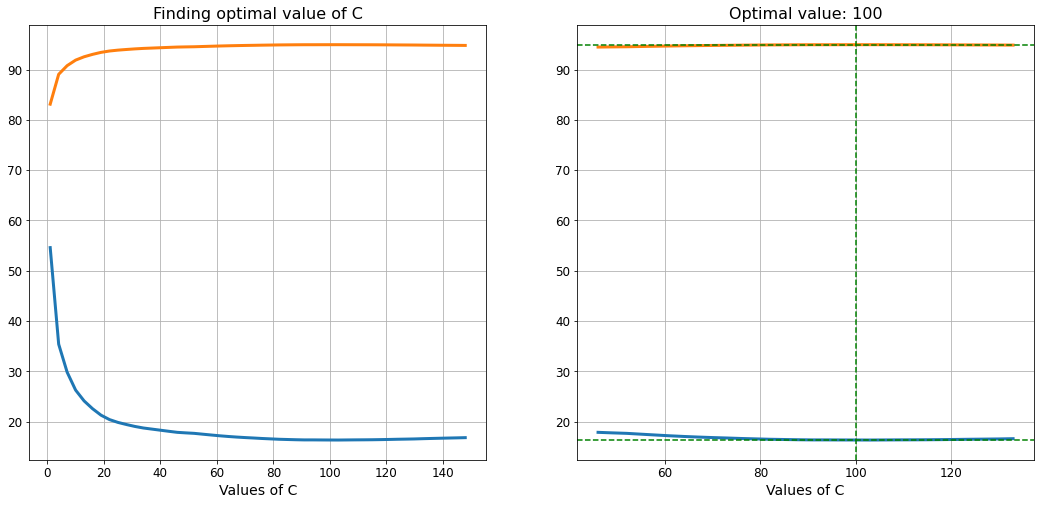

In [70]:
from sklearn.svm import SVR

n = range(1,150,3)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    svr = SVR(C=val)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.title('Finding optimal value of C',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of C",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 100',fontsize=16)
plt.plot(temp_df[15:45], linewidth =3)
plt.xlabel("Values of C",fontsize=14);
plt.axvline(x=100, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94.95, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=16.3, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True)

In [71]:
svr = SVR(C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 16.34
r2-Score: 94.95%


### NEAREST NEIGHBORS MODEL

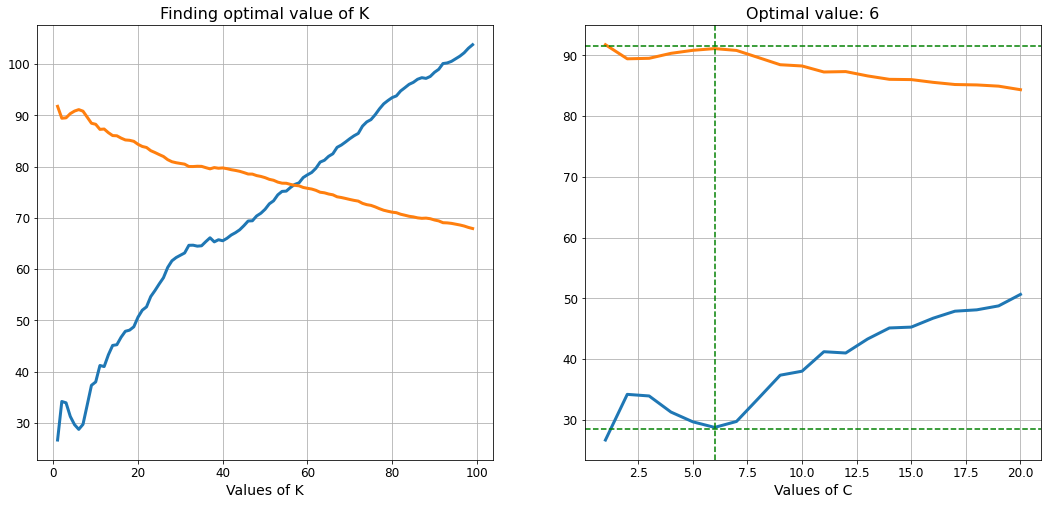

In [72]:
from sklearn.neighbors import KNeighborsRegressor

n = range(1,100)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    knn = KNeighborsRegressor(n_neighbors = val)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.title('Finding optimal value of K',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of K",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 6',fontsize=16)
plt.plot(temp_df[:20], linewidth =3)
plt.xlabel("Values of C",fontsize=14);
plt.axvline(x=6, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=91.5, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=28.5, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True);

In [73]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 28.75
r2-Score: 91.11%


### TREE BASED MODELS

#### DECISION TREE

In [74]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion ='friedman_mse', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 27.98
r2-Score: 91.35%


#### EXTRATREE REGRESSOR

In [75]:
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 44.41
r2-Score: 86.27%


### ENSEMBLE LEARNING MODELS

#### ADABOOST

In [76]:
from sklearn.ensemble import AdaBoostRegressor
svr_ada = SVR(C=100)
ada = AdaBoostRegressor(svr_ada, random_state=42, learning_rate=0.05, n_estimators=20)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 16.45
r2-Score: 94.92%


In [77]:
poly_reg_ada = PolynomialFeatures(degree=4)
X_poly_ada= poly_reg_ada.fit_transform(X_train)
X_poly_validate_ada = poly_reg_ada.transform(X_validate)
lr_ada = LinearRegression()
ada = AdaBoostRegressor(lr_ada, random_state=42, n_estimators=4)
ada.fit(X_poly_ada, y_train)
y_pred = ada.predict(X_poly_validate_ada)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 18.14
r2-Score: 94.39%


#### RANDOM FOREST

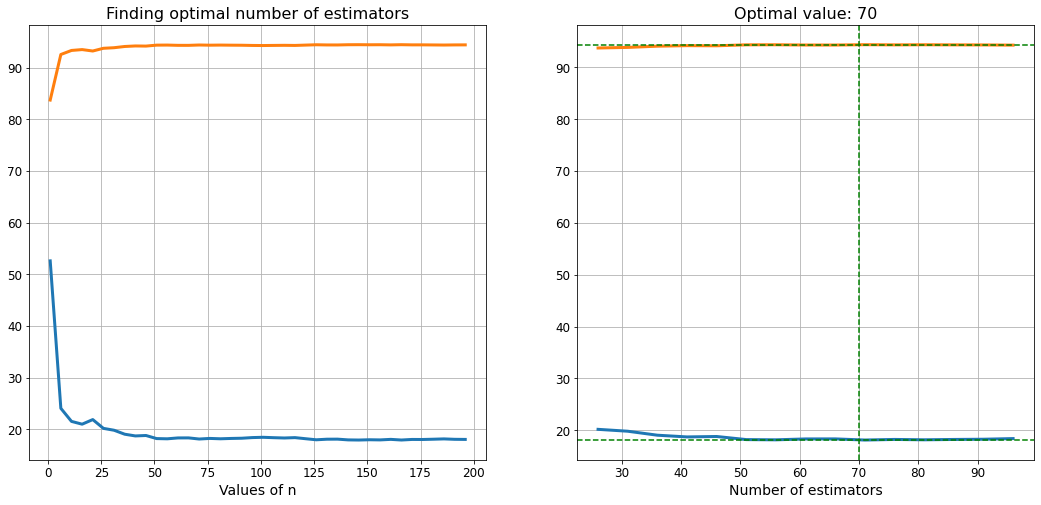

In [78]:
from sklearn.ensemble import RandomForestRegressor

n = range(1,200, 5)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    rf = RandomForestRegressor(n_estimators = val, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.title('Finding optimal number of estimators',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of n",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 70',fontsize=16)
plt.plot(temp_df[5:20], linewidth =3)
plt.xlabel("Number of estimators",fontsize=14);
plt.axvline(x=70, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94.4, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=18.2, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True);

In [79]:
rf = RandomForestRegressor(n_estimators = 70, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 18.14
r2-Score: 94.39%


#### HISTOGRAM GRADIENT BOOSTING

In [80]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr = HistGradientBoostingRegressor(random_state=42)
hgbr.fit(X_train, y_train)
y_pred = hgbr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 13.77
r2-Score: 95.74%


#### BAGGING

##### BAGGING OF SVR

In [81]:
from sklearn.ensemble import BaggingRegressor

svr_bag = SVR(C=100)
bag = BaggingRegressor(base_estimator= svr_bag, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 17.48
r2-Score: 94.60%


##### BAGGING OF POLYNOMIAL LINEAR REGRESSION

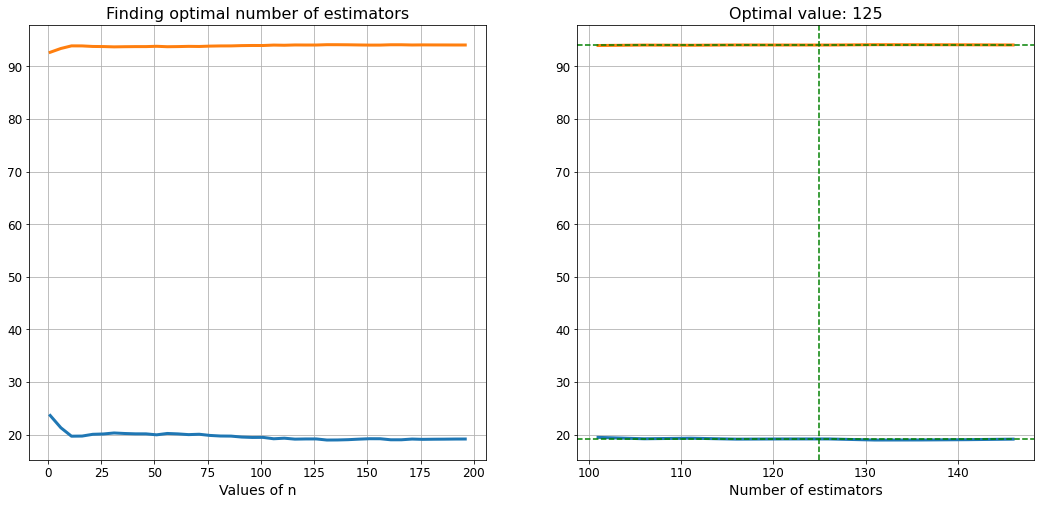

In [82]:
from sklearn.ensemble import BaggingRegressor

poly_reg_bag = PolynomialFeatures(degree=4)
X_poly_bag= poly_reg_bag.fit_transform(X_train)
X_poly_validate_bag = poly_reg_bag.transform(X_validate)
lr_bag = LinearRegression()


n = range(1,200, 5)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    bag = BaggingRegressor(base_estimator= lr_bag, random_state=42, n_estimators=val)
    bag.fit(X_poly_bag, y_train)
    y_pred = bag.predict(X_poly_validate_bag)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
# plt.plot(vals,accuracies, lw = 1.5, linestyle="-", c = 'b', label = 'Accuracy');
# plt.plot(vals,fones, lw = 1.5, linestyle="-", c = 'g', label = 'F1-Score');
plt.title('Finding optimal number of estimators',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of n",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 125',fontsize=16)
plt.plot(temp_df[20:30], linewidth =3)
plt.xlabel("Number of estimators",fontsize=14);
plt.axvline(x=125, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=19.2, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True);


# print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

In [83]:
from sklearn.ensemble import BaggingRegressor

poly_reg_bag = PolynomialFeatures(degree=4)
X_poly_bag= poly_reg_bag.fit_transform(X_train)
X_poly_validate_bag = poly_reg_bag.transform(X_validate)
lr_bag = LinearRegression()
bag = BaggingRegressor(base_estimator= lr_bag, random_state=42, n_estimators=125)
bag.fit(X_poly_bag, y_train)
y_pred = bag.predict(X_poly_validate_bag)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 19.19
r2-Score: 94.07%


In [84]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 12.92
r2-Score: 96.00%


#### VOTING REGRESSOR

In [85]:
from sklearn.ensemble import VotingRegressor

svr_vote = SVR(C=100)
hgbr_vote = HistGradientBoostingRegressor(random_state=42)
xgbr_vote = XGBRegressor(random_state=42)

vote = VotingRegressor(estimators = [
    ('svr_vote', svr_vote),
    ('hgbr_vote', hgbr_vote),
    ('xgbr_vote', xgbr_vote)
])

vote.fit(X_train, y_train)
y_pred = vote.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')


RMSE: 10.38
r2-Score: 96.79%


## MODEL PERFORMANCE ON TEST DATA

In [86]:
test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


In [87]:
test.shape

(103, 9)

In [88]:
for idx, row in test.iterrows():
    if test.loc[idx, 'slag']> 350:
        test.loc[idx, 'slag'] = 350
        
    if test.loc[idx, 'water']> 230:
        test.loc[idx, 'water'] = 230
        
    if test.loc[idx, 'water']< 124:
        test.loc[idx, 'water'] = 124
        
    if test.loc[idx, 'superplasticizer']> 25:
        test.loc[idx, 'superplasticizer'] = 25
        
    if test.loc[idx, 'fineaggregate']> 970:
        test.loc[idx, 'fineaggregate'] = 970

In [89]:
for idx, row in test.iterrows():
    if test.loc[idx, 'age']> 120:
        test.loc[idx, 'age'] = 120
        
    if test.loc[idx, 'age']== 1:
        test.loc[idx, 'age'] = 2
        
    if test.loc[idx, 'age']== 3:
        test.loc[idx, 'age'] = 2
        
    if test.loc[idx, 'age']== 91:
        test.loc[idx, 'age'] = 90

In [90]:
mylist = [28, 2, 7, 56, 90, 120, 14, 100]
mydict = {}
mylist.sort()
for (x,y) in enumerate(mylist):
    mydict[y]=x
    
    
print(mydict)

d = 50
takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
print(takeClosest(d, mylist))
print(mydict[takeClosest(d, mylist)])

{2: 0, 7: 1, 14: 2, 28: 3, 56: 4, 90: 5, 100: 6, 120: 7}
56
4


In [91]:
for idx, row in test.iterrows():
    test.loc[idx, 'age'] = mydict[takeClosest(test.loc[idx, 'age'], mylist)]
    

In [92]:
test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,7,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,1,55.90
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,3,74.50
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,0,35.30
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,3,10.54


In [93]:
test.age.value_counts()

3    38
0    16
1    14
2     8
4     7
5     7
7     7
6     6
Name: age, dtype: int64

In [94]:
test_handpicked = test[['cement', 'slag', 'water', 'superplasticizer', 'age', 'strength']]
test_handpicked.head()

,cement,slag,water,superplasticizer,age,strength
31,266.0,114.0,228.0,0.0,7,52.91
109,362.6,189.0,164.9,11.6,1,55.90
136,389.9,189.0,145.9,22.0,3,74.50
88,362.6,189.0,164.9,11.6,0,35.30
918,145.0,0.0,202.0,8.0,3,10.54


In [95]:
test_transformed=transformer_handpicked.transform(test_handpicked.iloc[:,:-1])
test_transformed.shape

(103, 5)

In [96]:
test_transformed = pd.DataFrame(test_transformed, columns = test_handpicked.columns.tolist()[:-1])
test_transformed['strength'] = test_handpicked['strength'].tolist()
print(test_transformed.shape)
test_transformed.head()


(103, 6)


,cement,slag,water,superplasticizer,age,strength
0,-0.004324,0.915796,2.164383,-1.235094,1.952349,52.91
1,0.825125,1.131276,-0.763820,0.956049,-1.030521,55.90
2,1.026116,1.131276,-1.676020,1.761775,0.113103,74.50
3,0.825125,1.131276,-0.763820,0.956049,-1.741615,35.30
4,-1.502522,-1.055997,0.974570,0.563670,0.113103,10.54


In [97]:
y_pred = vote.predict(test_transformed.iloc[:,:-1])
print(f'RMSE: {mean_squared_error(test_transformed.iloc[:,-1], y_pred):.2f}\nr2-Score: {r2_score(test_transformed.iloc[:,-1], y_pred)*100:.2f}%')

RMSE: 18.69
r2-Score: 92.97%


#### SELECTED MODEL: **VOTING REGRESSOR**

In [98]:
vote

VotingRegressor(estimators=[('svr_vote', SVR(C=100)),
                            ('hgbr_vote',
                             HistGradientBoostingRegressor(random_state=42)),
                            ('xgbr_vote',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None))])

In [99]:
performance_df = pd.DataFrame({"Metric": ['RMSE', 'r2-score'], "Validation-set performance": ['10.38', '0.97'], "Test-set performance": ['18.69', '0.93']})
performance_df.set_index('Metric', inplace=True)
performance_df

,Validation-set performance,Test-set performance
Metric,,
RMSE,10.38,18.69
r2-score,0.97,0.93


In [100]:
filename = 'transformer.sav'
joblib.dump(transformer_handpicked, filename)

['transformer.sav']

In [101]:
filename = 'model.sav'
joblib.dump(vote, filename)

['model.sav']